In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/MINDX K3 FINAL DATA.xlsx')

In [ ]:
## Dataset preview
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0,1,1,1,10134888,1
1,15647311,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,15619304,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,15701354,699,France,Female,39,1,0,2,0,0,9382663,0
4,15737888,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [ ]:
## Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   credit_score      10000 non-null  int64 
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   tenure            10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products_number   10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   active_member     10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


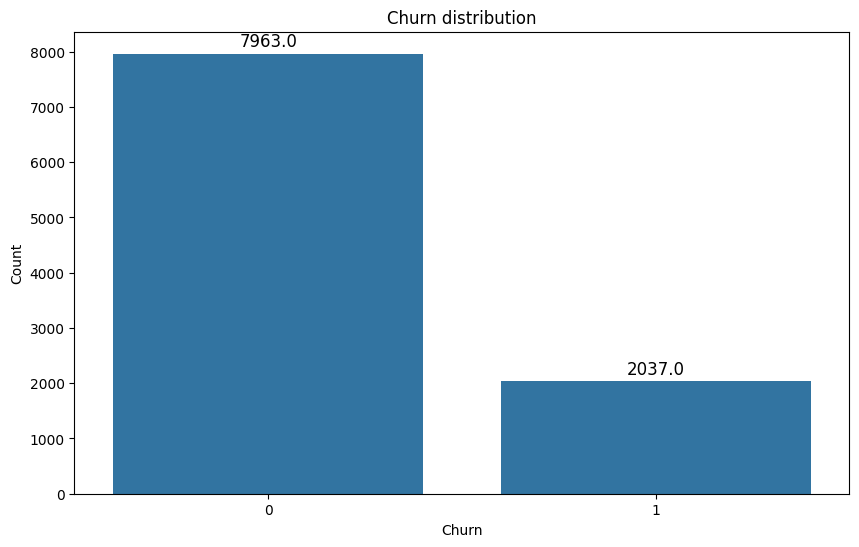

In [ ]:
## Phân phối cột churn
ax=sns.countplot(x='churn',data=df)
plt.title('Churn distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

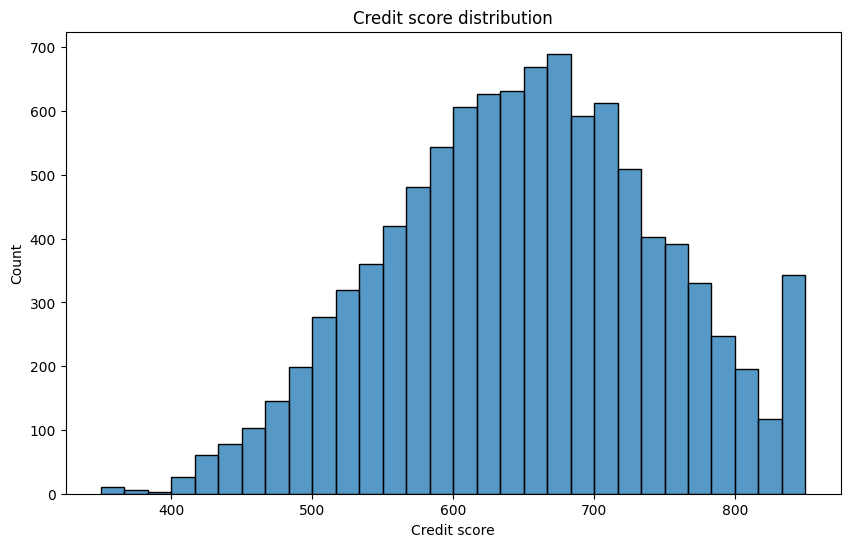

In [ ]:
## Phân phối cột credit score
ax2=sns.histplot(data=df, x='credit_score', bins=30)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Count')
plt.show()

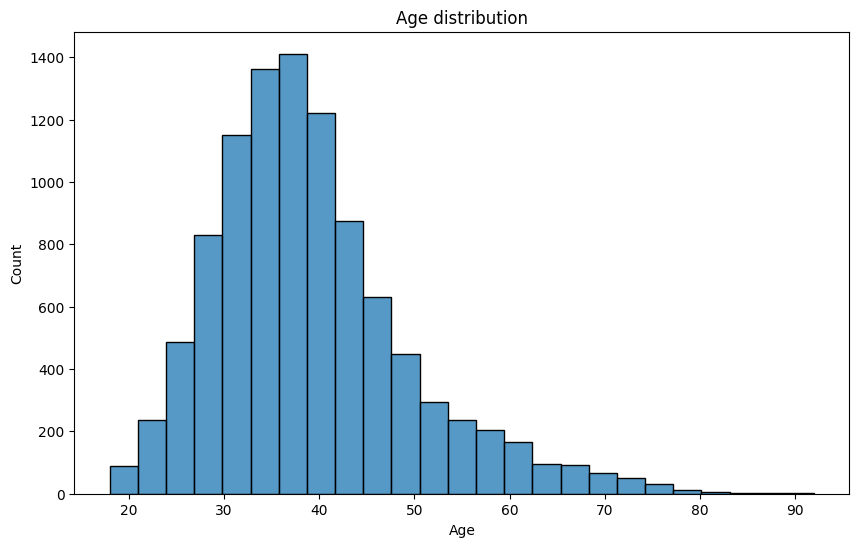

In [ ]:
## Phân phối cột age
ax3=sns.histplot(data=df, x='age', bins=25)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

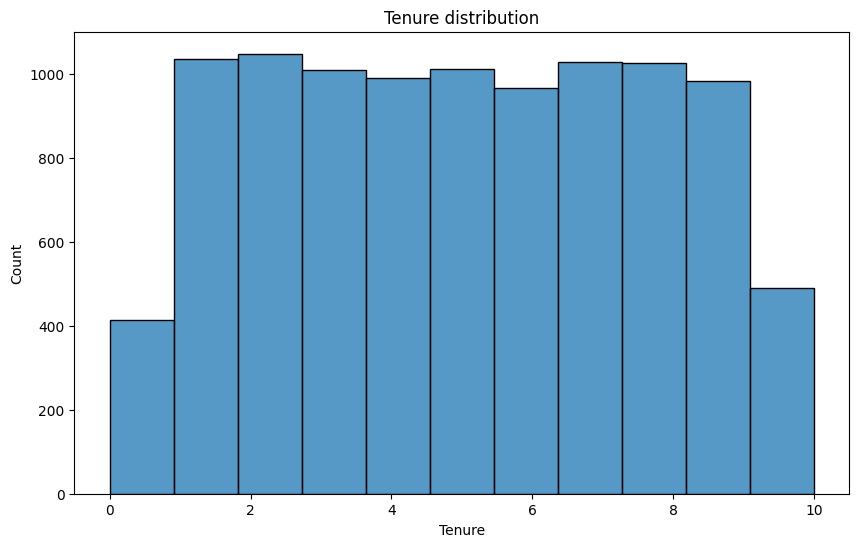

In [ ]:
## Phân phối cột tenure
ax4=sns.histplot(data=df, x='tenure', bins=11)
plt.title('Tenure distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

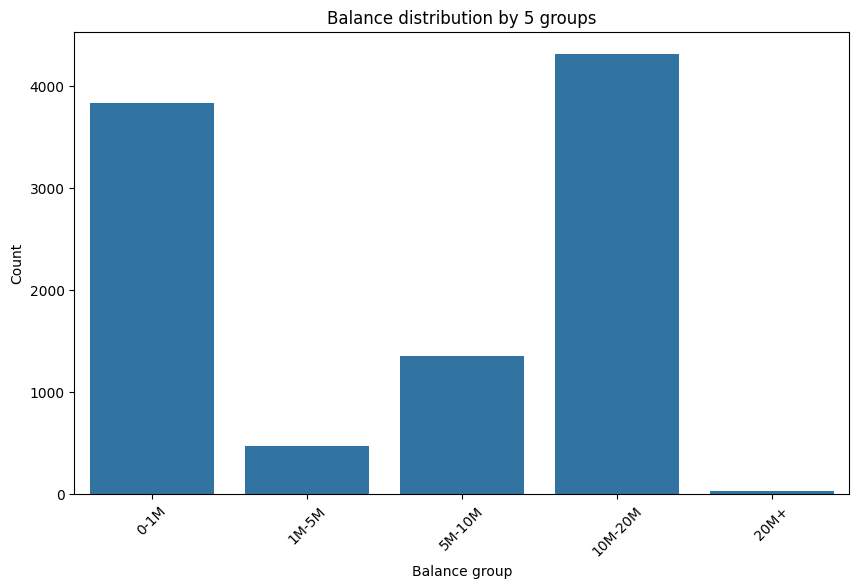

In [ ]:
## Phân phối cột balance
bins = [0, 1e6, 5e6, 10e6, 20e6, df['balance'].max()]
labels = ['0-1M', '1M-5M', '5M-10M', '10M-20M', '20M+']

# Tạo cột mới cho nhóm số dư
df['balance_group'] = pd.cut(df['balance'], bins=bins, labels=labels, include_lowest=True)
# Vẽ biểu đồ phân phối theo nhóm
plt.figure(figsize=(10,6))
sns.countplot(x='balance_group', data=df)
plt.title('Balance distribution by 5 groups')
plt.xlabel('Balance group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ nhìn hơn
plt.show()

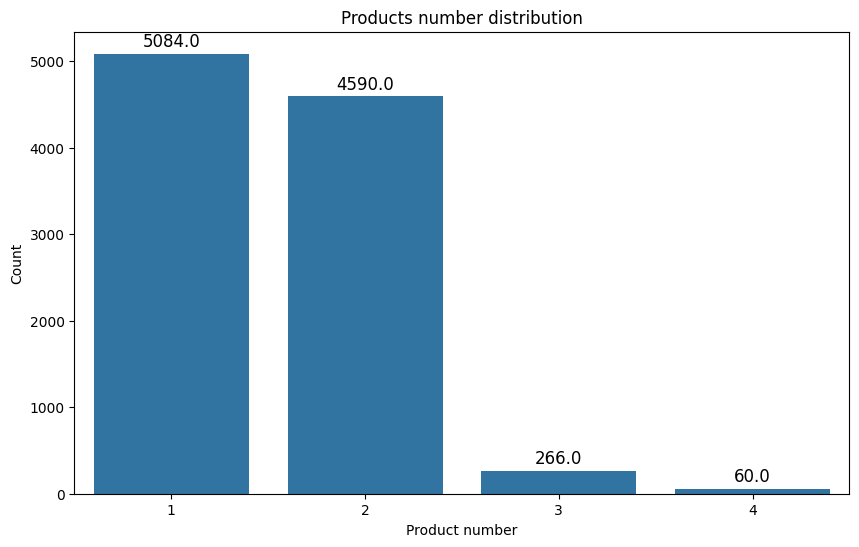

In [ ]:
## Phân phối của products number
ax2=sns.countplot(x='products_number',data=df)
plt.title('Products number distribution')
plt.xlabel('Product number')
plt.ylabel('Count')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

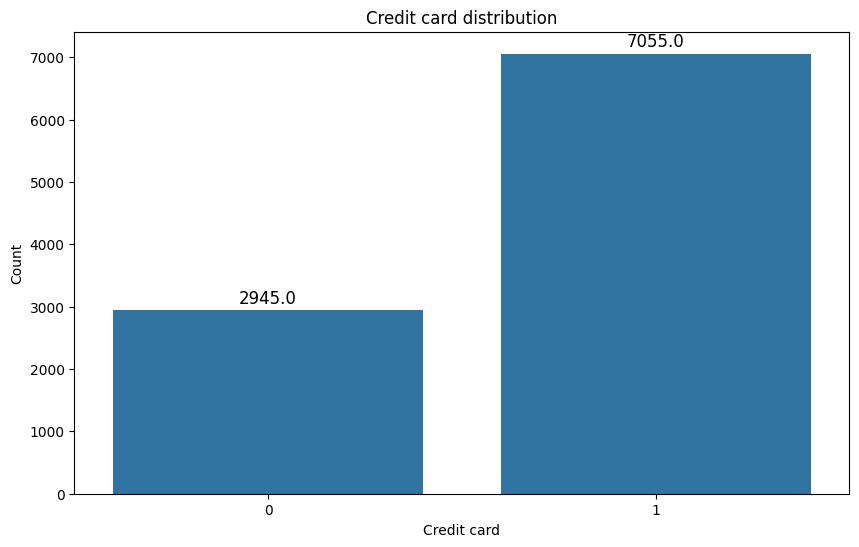

In [ ]:
## Phân phối của credit card
ax3=sns.countplot(x='credit_card',data=df)
plt.title('Credit card distribution')
plt.xlabel('Credit card')
plt.ylabel('Count')
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

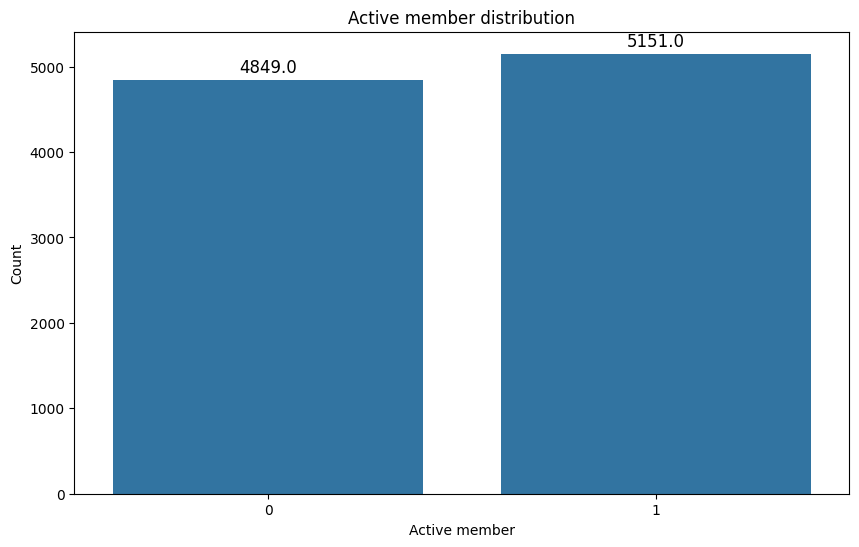

In [ ]:
## Phân phối của active member
ax4=sns.countplot(x='active_member',data=df)
plt.title('Active member distribution')
plt.xlabel('Active member')
plt.ylabel('Count')
for p in ax4.patches:
    ax4.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

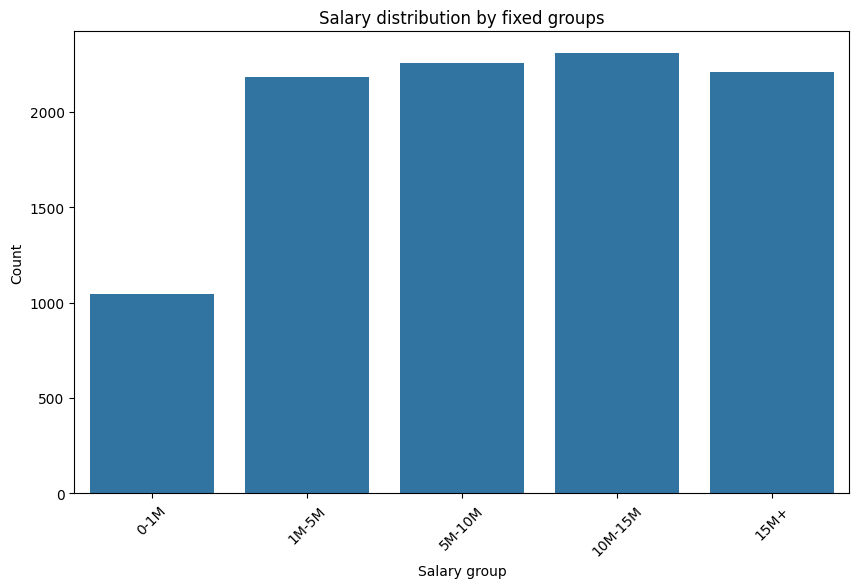

In [ ]:
## Phân phối của nhóm tiền lương
bins = [0, 1e6, 5e6, 10e6, 15e6, df['estimated_salary'].max()]
labels = ['0-1M', '1M-5M', '5M-10M', '10M-15M', '15M+']

# Tạo cột mới cho nhóm tiền lương
df['salary_category'] = pd.cut(df['estimated_salary'], bins=bins, labels=labels, include_lowest=True)

# Vẽ biểu đồ phân phối theo nhóm
plt.figure(figsize=(10, 6))
sns.countplot(x='salary_category', data=df)
plt.title('Salary distribution by fixed groups')
plt.xlabel('Salary group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ nhìn hơn
plt.show()

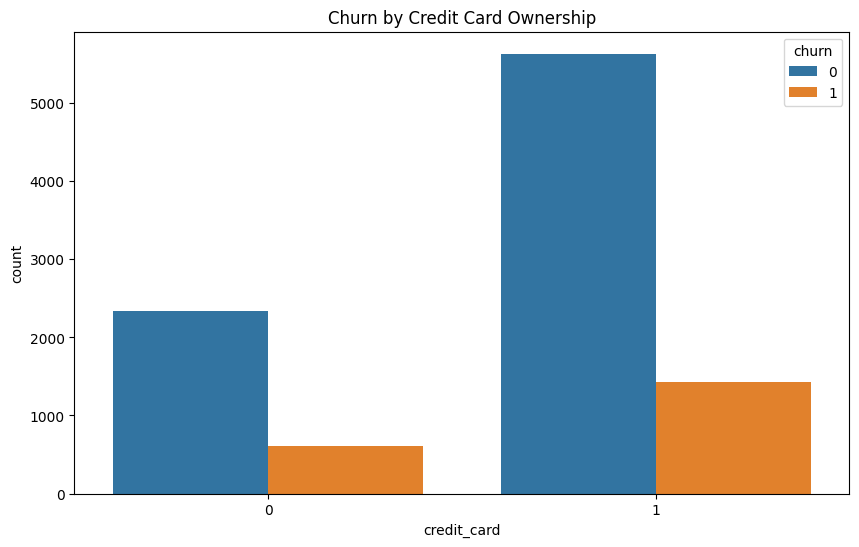

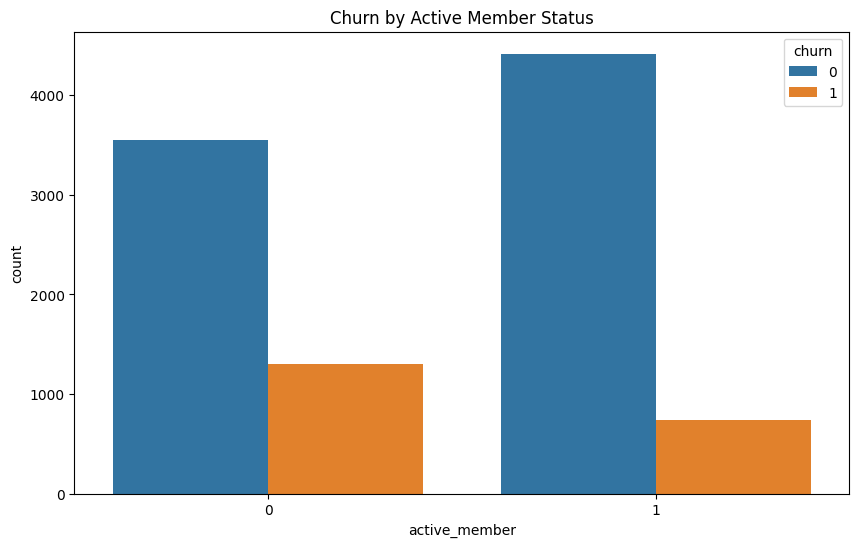

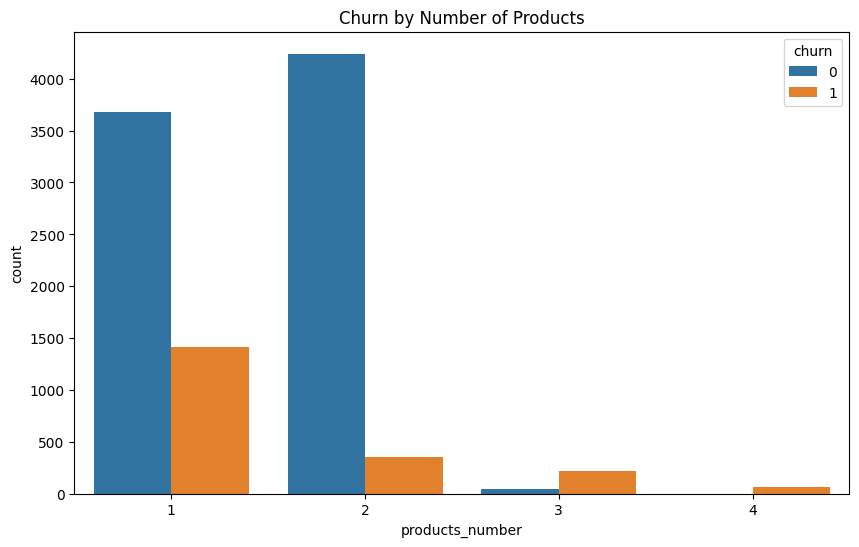

In [ ]:
## Kiểm tra mối quan hệ giữa các biến với churn
# Credit card
sns.countplot(x='credit_card', hue='churn', data=df)
plt.title('Churn by Credit Card Ownership')
plt.show()
# Active member
sns.countplot(x='active_member', hue='churn', data=df)
plt.title('Churn by Active Member Status')
plt.show()
# Products number
sns.countplot(x='products_number', hue='churn', data=df)
plt.title('Churn by Number of Products')
plt.show()

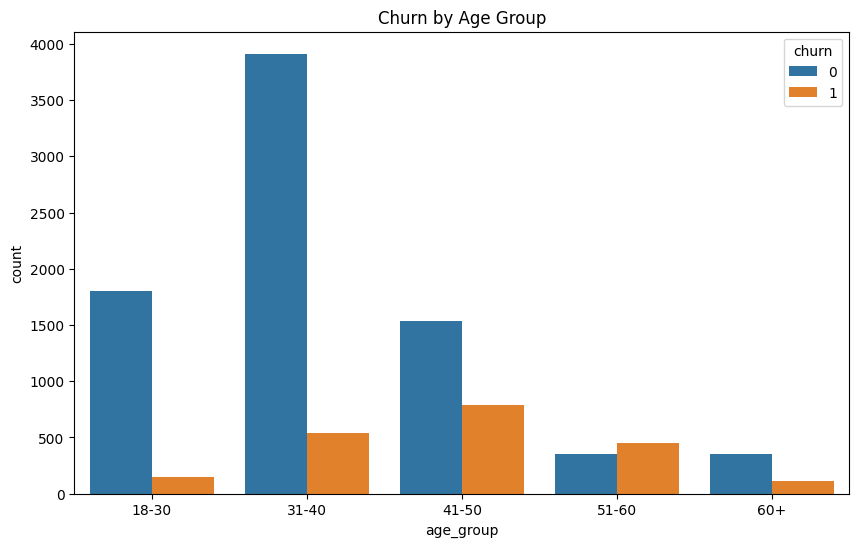

In [ ]:
## Churn theo nhóm tuổi
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
sns.countplot(x='age_group', hue='churn', data=df)
plt.title('Churn by Age Group')
plt.show()

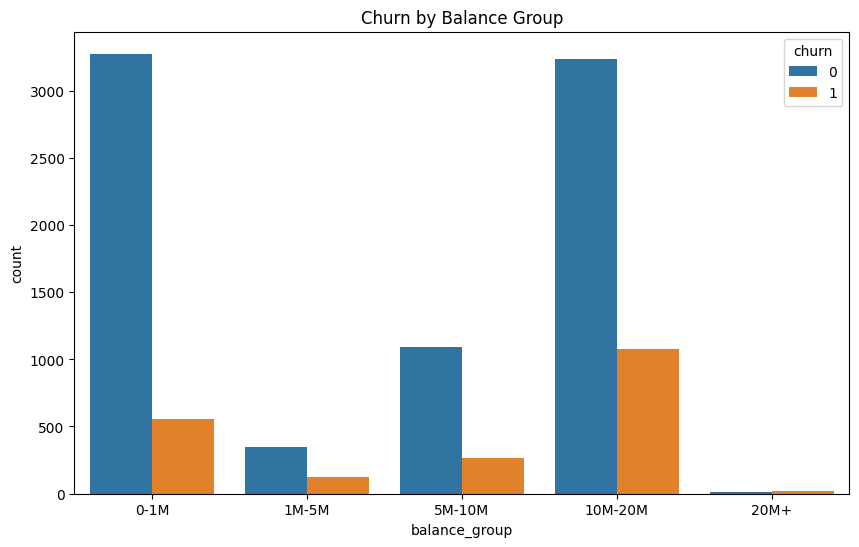

In [ ]:
## Churn theo nhóm số dư
sns.countplot(x='balance_group', hue='churn', data=df)
plt.title('Churn by Balance Group')
plt.show()

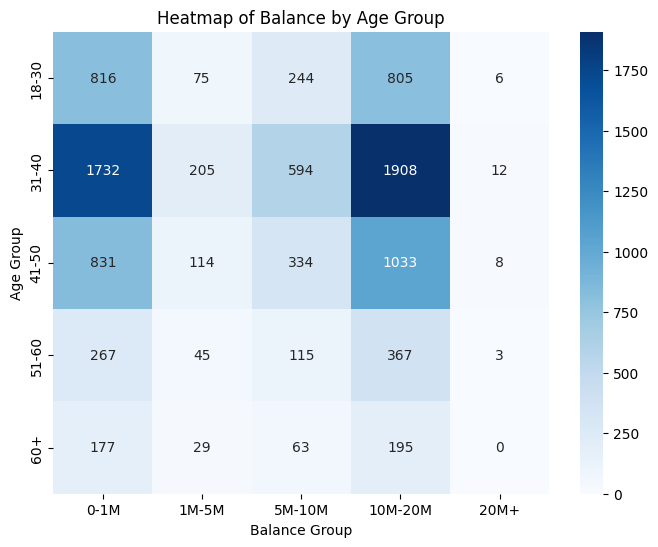

In [ ]:
## Số dư theo độ tuổi
heatmap_data = pd.crosstab(df['age_group'], df['balance_group'])
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Balance by Age Group')
plt.xlabel('Balance Group')
plt.ylabel('Age Group')
plt.show()

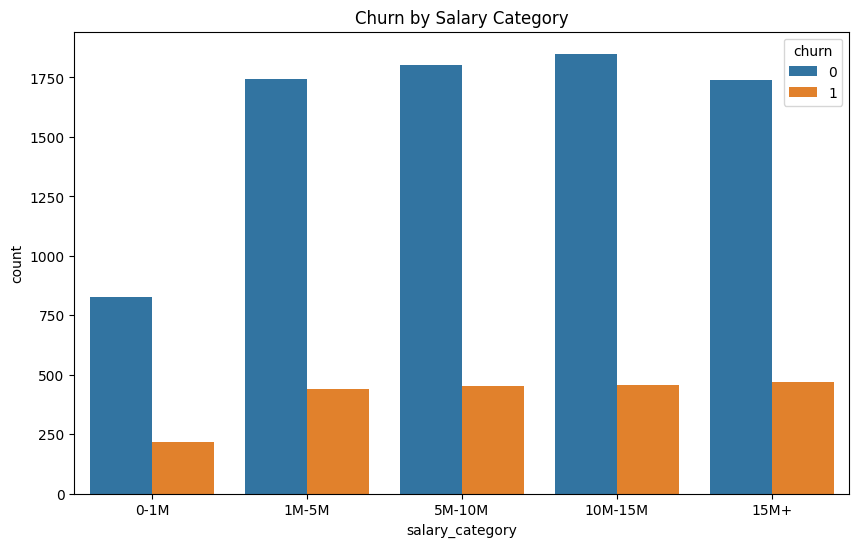

In [ ]:
## Churn theo nhóm tiền lương
sns.countplot(x='salary_category', hue='churn', data=df)
plt.title('Churn by Salary Category')
plt.show()

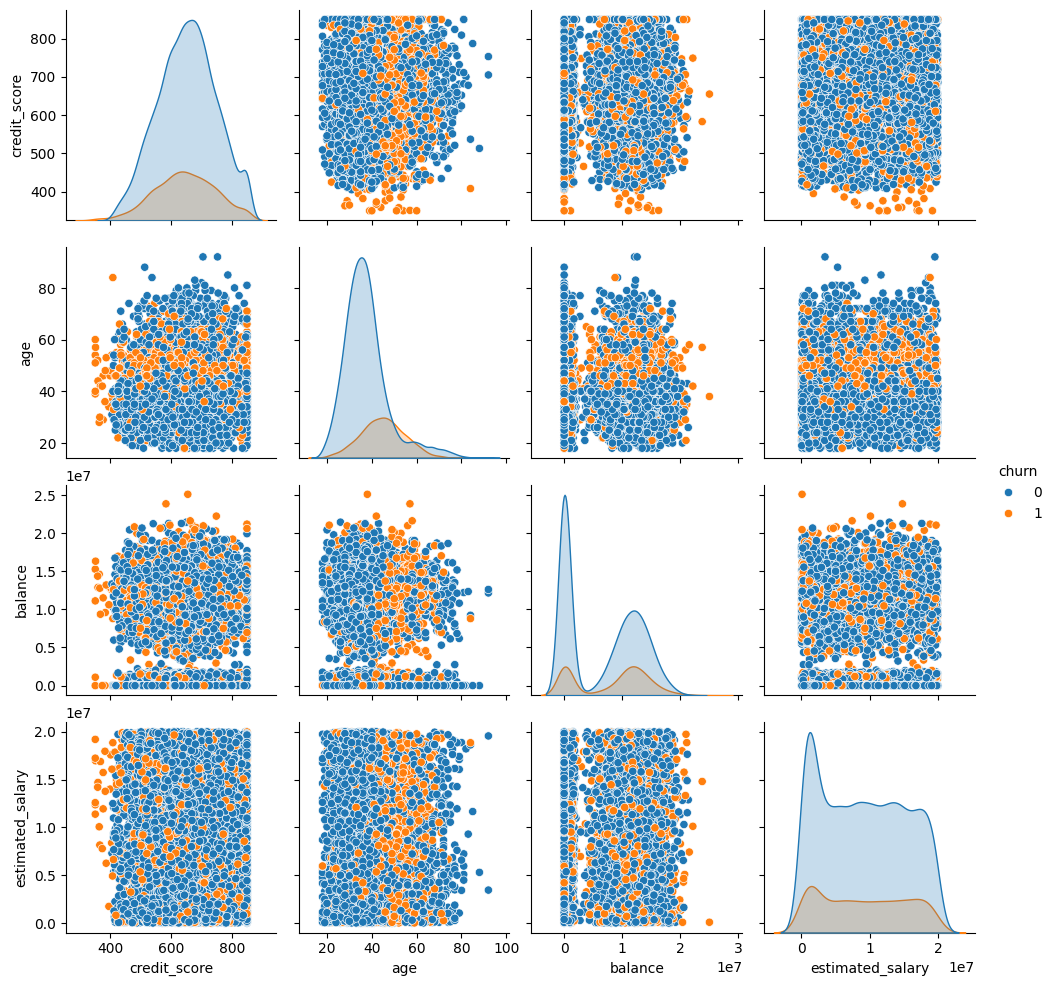

In [ ]:
sns.pairplot(df, hue='churn', vars=['credit_score', 'age', 'balance', 'estimated_salary'])
plt.show()

In [ ]:
## Tạo df mới để tiến hành xem tương quan và xây dựng mô hình
data=df.drop(['age_group','salary_category','balance_group','customer_id'],axis=1)

In [ ]:
## Encode nhãn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['country']=le.fit_transform(data['country'])

In [ ]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0,1,1,1,10134888,1
1,608,2,0,41,1,8380786,1,0,1,11254258,0
2,502,0,0,42,8,1596608,3,1,0,11393157,1
3,699,0,0,39,1,0,2,0,0,9382663,0
4,850,2,0,43,2,12551082,1,1,1,790841,0


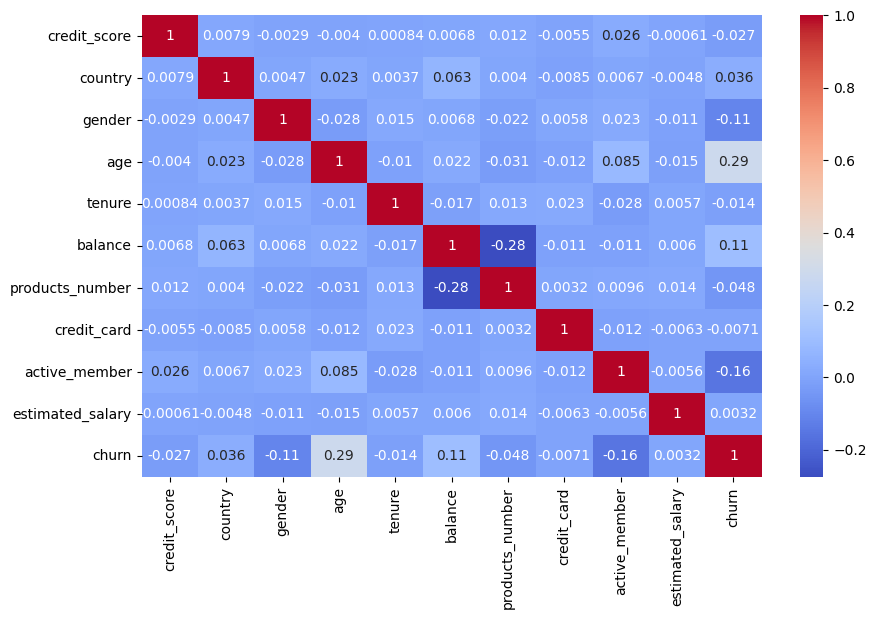

In [ ]:
## Check tương quan giữa các bién
cor=data.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
## Scale dữ liệu
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data.drop('churn',axis=1))
data_scaled=pd.DataFrame(data_scaled,columns=data.columns[:-1])

In [ ]:
data_scaled.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.110553,-0.911583,0.646092,0.970243,0.170614,1
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.222782,-0.911583,-1.547768,0.970243,0.353281,0
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,-0.856542,2.527057,0.646092,-1.030670,0.375948,1
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.110553,0.807737,-1.547768,-1.030670,0.047859,0
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.886252,-0.911583,0.646092,0.970243,-1.354223,0


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
models = [LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    XGBClassifier()]

In [ ]:
precision=[]
recall=[]
f1=[]
time=[]
name=[]

In [ ]:
X = data_scaled.drop("churn", axis=1)
y = data_scaled["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
for model in models:
  t1 = datetime.datetime.now()
  model_name = model.__class__.__name__
  model.fit(X_train, y_train)
  t2= datetime.datetime.now()
  d = round((t2-t1).microseconds/1000,1) #Tính thời gian
  y_pred = model.predict(X_test)
  pre = round(precision_score(y_test, y_pred,average='micro'),2)
  rec = round(recall_score(y_test, y_pred,average='micro'),2)
  f1_=round(f1_score(y_test, y_pred,average='micro'),2)
  precision.append(pre)
  recall.append(rec)
  f1.append(f1_)
  time.append(d)
  name.append(model_name)

In [ ]:
Results = pd.DataFrame(np.column_stack([name, precision, recall,f1]),columns=['Name', 'Precision','Recall','F1-score'])

In [ ]:
Results.drop_duplicates(subset='Name', keep='first', inplace=True)
Results.reset_index(drop=True, inplace=True)
Results

,Name,Precision,Recall,F1-score
0,LogisticRegression,0.82,0.82,0.82
1,DecisionTreeClassifier,0.8,0.8,0.8
2,RandomForestClassifier,0.87,0.87,0.87
3,SVC,0.86,0.86,0.86
4,KNeighborsClassifier,0.84,0.84,0.84
5,XGBClassifier,0.86,0.86,0.86


In [ ]:
## Random Forest
X = data_scaled.drop("churn", axis=1)
y = data_scaled["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8653333333333333


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.44      0.56       584

    accuracy                           0.87      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [ ]:
## Mô hình sau khi Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy: 0.841
